<a href="https://colab.research.google.com/github/Ramziia-Khairutdinova/IAAC2024_tutorials/blob/main/Ramziia_Khairutdinova_02_osm_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/STASYA00/IAAC2024_tutorials/blob/main/quickstarts/02_osm_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> - Stasja's notebook

In [1]:
!pip install osmnx geopy scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.4/107.4 kB 1.1 MB/s eta 0:00:00


In [2]:
import geopandas
import matplotlib.pyplot as plt
import osmnx
import seaborn as sns
from shapely.geometry import Point, LineString

sns.set_style(style="dark")

### 🕸 Street network

In [7]:
PLACE_NAME = "el Clot, Barcelona, Spain"
graph = osmnx.graph_from_place(PLACE_NAME)

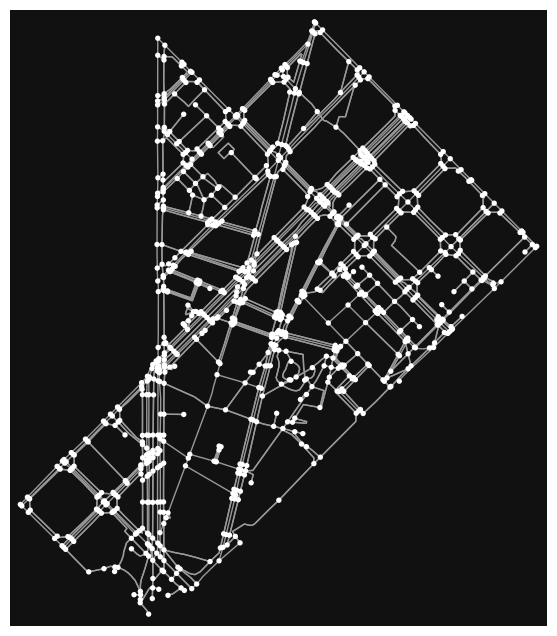

In [8]:
# showing our street network

figure, ax = osmnx.plot_graph(graph)

### 🕍 Building footprints

We can retrieve places information as well (buildings, parks, amenities etc). The data that we retrieve is a dataframe, like the ones we worked with during the previous term:

In [10]:
buildings = osmnx.geometries_from_place(
    PLACE_NAME,
    {"building": True},
)

buildings.head()

<ipython-input-10-25295188f309>:1: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  buildings = osmnx.geometries_from_place(


addr:housenumber addr:postcode  \
element_type osmid                                      
way          93219899               835         08018   
             146984774              2-3         08026   
             185460923              234         08027   
             185462389              NaN           NaN   
             185462392              NaN           NaN   

                                            addr:street  \
element_type osmid                                        
way          93219899   Gran Via de les Corts Catalanes   
             146984774           Plaça del Canonge Rodó   
             185460923    Carrer de Las Navas de Tolosa   
             185462389                              NaN   
             185462392                              NaN   

                                                                 geometry  \
element_type osmid                                                          
way          93219899   POLYGON ((2.18821 41.40530, 2.18828 41.40526, ...   
             146984774  POLYGON ((2.18752 41.40990, 2.18758 41.40988, ...   
             185460923  POLYGON ((2.18963 41.41338, 2.18966 41.41341, ...   
             185462389  POLYGON ((2.19052 41.41443, 2.19064 41.41471, ...   
             185462392  POLYGON ((2.18974 41.41293, 2.18976 41.41294, ...   

                        addr:city           amenity  \
element_type osmid                                    
way          93219899   Barcelona               NaN   
             146984774  Barcelona  place_of_worship   
             185460923        NaN               NaN   
             185462389        NaN               NaN   
             185462392        NaN               NaN   

                                                        name  \
element_type osmid                                             
way          93219899   Centre cultural La Farinera del Clot   
             146984774                   Sant Martí del Clot   
             185460923                                   NaN   
             185462389                                   NaN   
             185462392                                   NaN   

                                                     name:ca access  \
element_type osmid                                                    
way          93219899   Centre cultural La Farinera del Clot    NaN   
             146984774                   Sant Martí del Clot    NaN   
             185460923                                   NaN    NaN   
             185462389                                   NaN    NaN   
             185462392                                   NaN    NaN   

                         wikidata  ...  fee image start_date website:en  \
element_type osmid                 ...                                    
way          93219899   Q19256811  ...  NaN   NaN        NaN        NaN   
             146984774  Q98756038  ...  NaN   NaN        NaN        NaN   
             185460923        NaN  ...  NaN   NaN        NaN        NaN   
             185462389        NaN  ...  NaN   NaN        NaN        NaN   
             185462392        NaN  ...  NaN   NaN        NaN        NaN   

                       website:es ways type addr:housenumber2  \
element_type osmid                                              
way          93219899         NaN  NaN  NaN               NaN   
             146984774        NaN  NaN  NaN               NaN   
             185460923        NaN  NaN  NaN               NaN   
             185462389        NaN  NaN  NaN               NaN   
             185462392        NaN  NaN  NaN               NaN   

                       addr:postcode:source addr:street:sym_ul  
element_type osmid                                              
way          93219899                   NaN                NaN  
             146984774                  NaN                NaN  
             185460923                  NaN                NaN  
             185462389       

<Axes: >

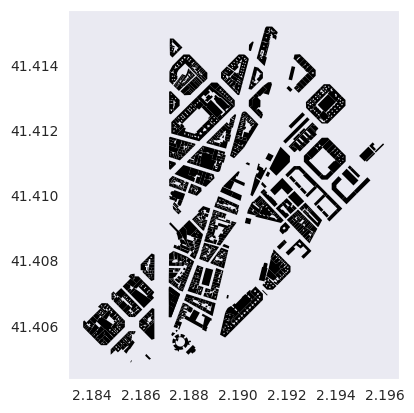

In [11]:
buildings.plot(color="black", edgecolor="none")

### 🍽 Other data extraction

There is a lot more data that can be extracted, like parks, amenities and more! See the entire list [here](https://wiki.openstreetmap.org/wiki/Map_features).

In [27]:
restaurants = osmnx.geometries_from_place(
    PLACE_NAME,
    {
        "amenity": "restaurant"

    }
)
restaurants.head()

<ipython-input-27-1feccad134dc>:1: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  restaurants = osmnx.geometries_from_place(


addr:housenumber                   addr:street  \
element_type osmid                                                       
node         3009041122              282                  Lope de Vega   
             3009083162              NaN  Carrer del Concili de Trento   
             3009091336               48  Carrer del Concili de Trento   
             3049368345               78               Carrer del Clot   
             3049371937               49               Carrer del Clot   

                            amenity  \
element_type osmid                    
node         3009041122  restaurant   
             3009083162  restaurant   
             3009091336  restaurant   
             3049368345  restaurant   
             3049371937  restaurant   

                                                         contact:facebook  \
element_type osmid                                                          
node         3009041122  https://www.facebook.com/Frankfurt.Elracodelamel   
             3009083162                                               NaN   
             3009091336                                               NaN   
             3049368345                                               NaN   
             3049371937                                               NaN   

                                                    name  \
element_type osmid                                         
node         3009041122      Frankfurt El Racó de la Mel   
             3009083162                  Golf Restaurant   
             3009091336  Bar Restaurant Virona4 Pizzeria   
             3049368345                   A ruta gallega   
             3049371937                      La Clotenca   

                                         geometry       cuisine  \
element_type osmid                                                
node         3009041122  POINT (2.19359 41.41222)           NaN   
             3009083162  POINT (2.19331 41.41164)           NaN   
             3009091336  POINT (2.19317 41.41155)  indian;pizza   
             3049368345  POINT (2.18852 41.40832)           NaN   
             3049371937  POINT (2.18806 41.40772)         pizza   

                                           website  addr:city internet_access  \
element_type osmid                                                              
node         3009041122                        NaN        NaN             NaN   
             3009083162                        NaN        NaN             NaN   
             3009091336  http://virona4pizzeria.es        NaN             NaN   
             3049368345                        NaN  Barcelona             NaN   
             3049371937                        NaN  Barcelona            wlan   

                         ... payment:coins payment:visa payment:visa_debit  \
element_type osmid       ...                                                 
node         3009041122  ...           NaN          NaN                NaN   
             3009083162  ...           NaN          NaN                NaN   
             3009091336  ...           NaN          NaN                NaN   
             3049368345  ...           NaN          NaN                NaN   
             3049371937  ...           NaN          NaN                NaN   

                        contact:phone description payment:discover_card  \
element_type osmid                                                        
node         3009041122           NaN         NaN                   NaN   
             3009083162           NaN         NaN                   NaN   
             3009091336           NaN         NaN                   NaN   
             3049368345           NaN         NaN                   NaN   
             3049371937           NaN         NaN                   NaN   

                        payment:mastercard nodes building:levels building:part  
element_type osmid                                                            

In [31]:
trees = osmnx.geometries_from_place(
    PLACE_NAME,
    {
        "natural": "tree"

    }
)
trees.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-31-6d5856455e01>:1: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  trees = osmnx.geometries_from_place(


leaf_type natural source species:es  \
element_type osmid                                               
node         3226658024  broadleaved    tree   Bing    Palmera   
             3226658033  broadleaved    tree   Bing    Palmera   
             3226658043  broadleaved    tree   Bing    Palmera   
             4273043066          NaN    tree    NaN        NaN   
             4273043067          NaN    tree    NaN        NaN   

                                         geometry leaf_cycle loc_name species  
element_type osmid                                                             
node         3226658024  POINT (2.19513 41.41206)        NaN      NaN     NaN  
             3226658033  POINT (2.19439 41.41213)        NaN      NaN     NaN  
             3226658043  POINT (2.19473 41.41231)        NaN      NaN     NaN  
             4273043066  POINT (2.18957 41.40672)        NaN      NaN     NaN  
             4273043067  POINT (2.18968 41.40676)        NaN      NaN     NaN

In [44]:
toilets = osmnx.geometries_from_place(
    PLACE_NAME,
    {
        "amenity": "toilets"

    }
)
toilets.head()

<ipython-input-44-d41aaf85f532>:1: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  toilets = osmnx.geometries_from_place(


access  amenity                  geometry  \
element_type osmid                                                   
node         11292685943    yes  toilets  POINT (2.19179 41.40852)   
             11359749170    yes  toilets  POINT (2.18873 41.40725)   
             11360097218    yes  toilets  POINT (2.18818 41.40523)   

                          check_date female male wheelchair  
element_type osmid                                           
node         11292685943         NaN    NaN  NaN        NaN  
             11359749170         NaN    NaN  NaN        NaN  
             11360097218  2024-04-06    yes  yes        yes

In [51]:
playgrounds = osmnx.geometries_from_place(
    PLACE_NAME,
    {
        "leisure": "playground"

    }
)
playgrounds.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-51-f90e8a0f612d>:1: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  playgrounds = osmnx.geometries_from_place(


access     leisure                  geometry barrier  \
element_type osmid                                                             
node         3027824135    yes  playground  POINT (2.19498 41.40988)     NaN   
             4275716071    NaN  playground  POINT (2.19025 41.41062)     NaN   
             4306388337    NaN  playground  POINT (2.19124 41.41268)     NaN   
             5790179453    NaN  playground  POINT (2.18841 41.41217)     NaN   
             5790181653    yes  playground  POINT (2.19217 41.40867)     NaN   

                        toilets:wheelchair wheelchair nodes  
element_type osmid                                           
node         3027824135                NaN        NaN   NaN  
             4275716071                NaN        NaN   NaN  
             4306388337                NaN        NaN   NaN  
             5790179453                 no        yes   NaN  
             5790181653                NaN        NaN   NaN

In [73]:
pharmacy = osmnx.geometries_from_place(
    PLACE_NAME,
    {
        "amenity": "pharmacy"

    }
)
pharmacy.head()

<ipython-input-73-229341436ce7>:1: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pharmacy = osmnx.geometries_from_place(


addr:city                          addr:full  \
element_type osmid                                                      
node         3011015936  Barcelona           carrer Lope de Vega, 282   
             3027823936  Barcelona            gv corts catalanes, 931   
             3049368243  Barcelona                    carrer Clot, 50   
             3049368337  Barcelona  carrer del Concili de Trento, 7-9   
             3049395433  Barcelona                                NaN   

                        addr:housenumber addr:postcode  \
element_type osmid                                       
node         3011015936              282         08018   
             3027823936              931         08018   
             3049368243               50         08018   
             3049368337              7-9         08018   
             3049395433               57         08018   

                                          addr:street   amenity contact:phone  \
element_type osmid                                                              
node         3011015936           carrer Lope de Vega  pharmacy  +34933083958   
             3027823936            gv corts catalanes  pharmacy  +34933074050   
             3049368243                   carrer Clot  pharmacy           NaN   
             3049368337  carrer del Concili de Trento  pharmacy  +34933076700   
             3049395433               Carrer del Clot  pharmacy           NaN   

                        dispensing healthcare  \
element_type osmid                              
node         3011015936        yes   pharmacy   
             3027823936        yes        NaN   
             3049368243        yes   pharmacy   
             3049368337        yes   pharmacy   
             3049395433        yes   pharmacy   

                                                                      name  \
element_type osmid                                                           
node         3011015936                   Farmàcia Plana Mendo, Joan Josep   
             3027823936                Farmàcia Grimau Guardiola, Cristian   
             3049368243                        Farmàcia Moya Bort, M. Rosa   
             3049368337  Farmàcia Maria Pilar Arranz Bayod - M.C. Sallé...   
             3049395433                      Maria Teresa Peñafiel Vercher   

                         ...                  geometry  check_date  \
element_type osmid       ...                                         
node         3011015936  ...  POINT (2.19331 41.41230)         NaN   
             3027823936  ...  POINT (2.19465 41.40991)  2023-09-28   
             3049368243  ...  POINT (2.18811 41.40739)         NaN   
             3049368337  ...  POINT (2.19186 41.41085)         NaN   
             3049395433  ...  POINT (2.18814 41.40788)         NaN   

                                                         opening_hours  \
element_type osmid                                                       
node         3011015936                                            NaN   
             3027823936                                            NaN   
             3049368243  Mo-Fr 08:45-14:00,16:30-20:00; Sa 08:45-14:00   
             3049368337                                            NaN   
             3049395433                                            NaN   

                        wheelchair addr:country drive_through      emergency  \
element_type osmid                                                             
node         3011015936        NaN          NaN           NaN            NaN   
             3027823936        NaN          NaN           NaN            NaN   
             3049368243    limited          NaN           NaN            NaN   
             3049368337        NaN          NaN           NaN            NaN   
             3049395433         no           ES            no  defibrillator   

                        payment:mastercard payment:visa name:ca  
element_ty

In [78]:
schools = osmnx.geometries_from_place(
    PLACE_NAME,
    {
        "building": "school"

    }
)
schools.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-78-d74edaeae2e6>:1: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  schools = osmnx.geometries_from_place(


addr:city addr:housenumber addr:postcode   addr:street  \
element_type osmid                                                              
way          428336929       NaN              NaN           NaN           NaN   
             428478266       NaN              NaN           NaN           NaN   
             428478271       NaN              616         08018  Carrer Aragó   
             431443119       NaN              NaN           NaN           NaN   
             431443120       NaN              NaN           NaN           NaN   

                                                                 geometry  \
element_type osmid                                                          
way          428336929  POLYGON ((2.19194 41.40825, 2.19222 41.40845, ...   
             428478266  POLYGON ((2.19037 41.41102, 2.19048 41.41098, ...   
             428478271  POLYGON ((2.18975 41.41056, 2.18986 41.41064, ...   
             431443119  POLYGON ((2.19076 41.41265, 2.19079 41.41263, ...   
             431443120  POLYGON ((2.19061 41.41305, 2.19073 41.41314, ...   

                                                                    nodes  \
element_type osmid                                                          
way          428336929  [4247064607, 4274548253, 4274548251, 427454824...   
             428478266  [4275716080, 4275716079, 4275716077, 427571607...   
             428478271  [8983434129, 8983415114, 8983415115, 439726000...   
             431443119  [4306388335, 4306388333, 4306388336, 430638833...   
             431443120  [4306388355, 4306388361, 4306388356, 430638835...   

                       building building:levels building:levels:underground  \
element_type osmid                                                            
way          428336929   school               3                         NaN   
             428478266   school               1                         NaN   
             428478271   school               4                           1   
             431443119   school               4                         NaN   
             431443120   school               3                         NaN   

                       ways  ... addr:housenumber2 addr:postcode:source  \
element_type osmid           ...                                          
way          428336929  NaN  ...               NaN                  NaN   
             428478266  NaN  ...               NaN                  NaN   
             428478271  NaN  ...               NaN                  NaN   
             431443119  NaN  ...               NaN                  NaN   
             431443120  NaN  ...               NaN                  NaN   

                       addr:street:sym_ul amenity email name name:ca phone  \
element_type osmid                                                           
way          428336929                NaN     NaN   NaN  NaN     NaN   NaN   
             428478266                NaN     NaN   NaN  NaN     NaN   NaN   
             428478271                NaN     NaN   NaN  NaN     NaN   NaN   
             431443119                NaN     NaN   NaN  NaN     NaN   NaN   
             431443120                NaN     NaN   NaN  NaN     NaN   NaN   

                       website wikidata  
element_type osmid                       
way          428336929     NaN      NaN  
             428478266     NaN      NaN  
             428478271     NaN      NaN  
             431443119     NaN      NaN  
             431443120     NaN      NaN  

[5 rows x 21 columns]

### 🎢 Putting it all together in one map

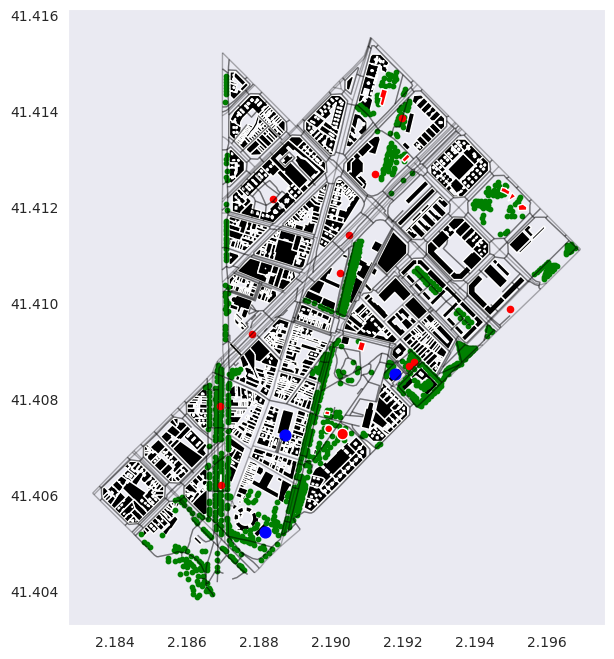

In [55]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings.plot(ax=ax, facecolor="black")



# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

# Plot restaurants
#restaurants.plot(ax=ax, color="orange", markersize=10)

# Plot trees
trees.plot(ax=ax, color="green", markersize=10)

# Plot trees
playgrounds.plot(ax=ax, color="red", markersize=20)

# Plot toilets
toilets.plot(ax=ax, color="blue", markersize=60)
plt.show()

### 📍Mapping our own place

There are several ways to map our place on the map:

1. placing a point when we know the exact coordinates
2. finding place's coordinates via [geocoding](https://nominatim.org/)

#### 📍Placing a point by its coordinates

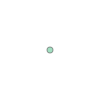

In [60]:
coords = (2.19566,41.41114)
p = Point(coords)
p

In [61]:
print(p.x, p.y)

2.19566 41.41114


In [62]:
geom = geopandas.GeoDataFrame(
    {
        "geometry": [p],
    },
    crs=edges.crs
)

In [58]:
buildings.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


addr:housenumber addr:postcode  \
element_type osmid                                      
way          93219899               835         08018   
             146984774              2-3         08026   
             185460923              234         08027   
             185462389              NaN           NaN   
             185462392              NaN           NaN   

                                            addr:street  \
element_type osmid                                        
way          93219899   Gran Via de les Corts Catalanes   
             146984774           Plaça del Canonge Rodó   
             185460923    Carrer de Las Navas de Tolosa   
             185462389                              NaN   
             185462392                              NaN   

                                                                 geometry  \
element_type osmid                                                          
way          93219899   POLYGON ((2.18821 41.40530, 2.18828 41.40526, ...   
             146984774  POLYGON ((2.18752 41.40990, 2.18758 41.40988, ...   
             185460923  POLYGON ((2.18963 41.41338, 2.18966 41.41341, ...   
             185462389  POLYGON ((2.19052 41.41443, 2.19064 41.41471, ...   
             185462392  POLYGON ((2.18974 41.41293, 2.18976 41.41294, ...   

                        addr:city           amenity  \
element_type osmid                                    
way          93219899   Barcelona               NaN   
             146984774  Barcelona  place_of_worship   
             185460923        NaN               NaN   
             185462389        NaN               NaN   
             185462392        NaN               NaN   

                                                        name  \
element_type osmid                                             
way          93219899   Centre cultural La Farinera del Clot   
             146984774                   Sant Martí del Clot   
             185460923                                   NaN   
             185462389                                   NaN   
             185462392                                   NaN   

                                                     name:ca access  \
element_type osmid                                                    
way          93219899   Centre cultural La Farinera del Clot    NaN   
             146984774                   Sant Martí del Clot    NaN   
             185460923                                   NaN    NaN   
             185462389                                   NaN    NaN   
             185462392                                   NaN    NaN   

                         wikidata  ...  fee image start_date website:en  \
element_type osmid                 ...                                    
way          93219899   Q19256811  ...  NaN   NaN        NaN        NaN   
             146984774  Q98756038  ...  NaN   NaN        NaN        NaN   
             185460923        NaN  ...  NaN   NaN        NaN        NaN   
             185462389        NaN  ...  NaN   NaN        NaN        NaN   
             185462392        NaN  ...  NaN   NaN        NaN        NaN   

                       website:es ways type addr:housenumber2  \
element_type osmid                                              
way          93219899         NaN  NaN  NaN               NaN   
             146984774        NaN  NaN  NaN               NaN   
             185460923        NaN  NaN  NaN               NaN   
             185462389        NaN  NaN  NaN               NaN   
             185462392        NaN  NaN  NaN               NaN   

                       addr:postcode:source addr:street:sym_ul  
element_type osmid                                              
way          93219899                   NaN                NaN  
             146984774                  NaN                NaN  
             185460923                  NaN                NaN  
             185462389       

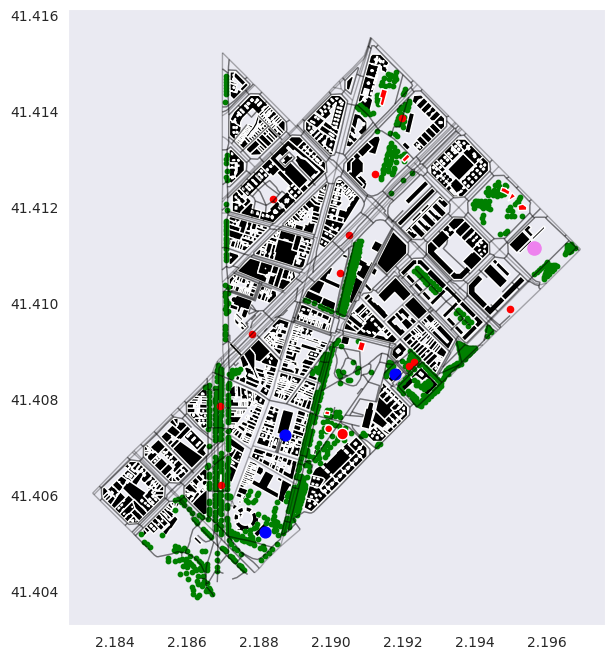

In [68]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings.plot(ax=ax, facecolor="black")

# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

# Plot restaurants
#restaurants.plot(ax=ax, color="orange", markersize=10)

# Plot trees
trees.plot(ax=ax, color="green", markersize=10)

# Plot trees
playgrounds.plot(ax=ax, color="red", markersize=20)

# Plot toilets
toilets.plot(ax=ax, color="blue", markersize=60)

# Plot Complex Esportiu Municipal Clot de la Mel
geom.plot(ax=ax, facecolor="violet", markersize=90)
plt.show()

#### ㊙️ Geocoding: name to coordinates

In [59]:
our_place = "Complex Esportiu Municipal Clot de la Mel"  # Complex Esportiu Municipal Clot de la Mel"
geocoded_addresses = geopandas.tools.geocode(
    [our_place],
    provider="nominatim",
    user_agent="autogis2023",
    timeout=10
)
geocoded_addresses.head()

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


,geometry,address
0,POINT (2.19566 41.41114),Complex Esportiu Municipal Clot de la Mel (CEM...


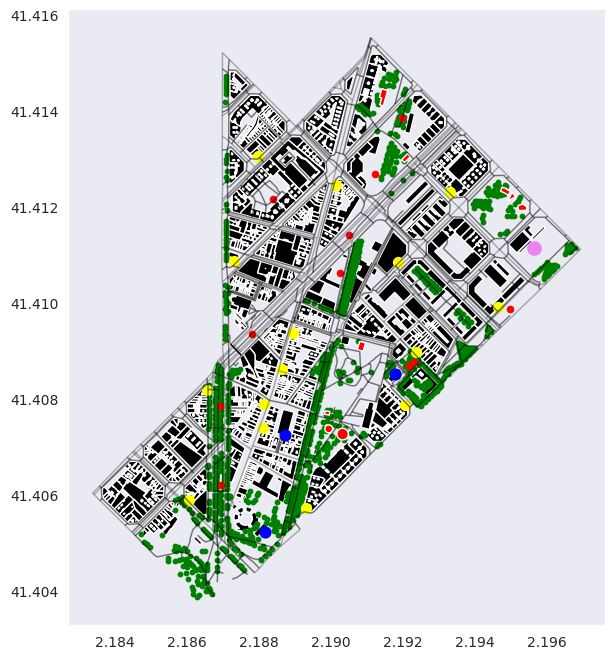

In [77]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings.plot(ax=ax, facecolor="black")

# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

# Plot restaurants
#restaurants.plot(ax=ax, color="orange", markersize=10)

# Plot trees
trees.plot(ax=ax, color="green", markersize=10)

# Plot trees
playgrounds.plot(ax=ax, color="red", markersize=20)

# Plot toilets
toilets.plot(ax=ax, color="blue", markersize=60)

# Plot pharmacy
pharmacy.plot(ax=ax, color="yellow", markersize=50)

# Plot Complex Esportiu Municipal Clot de la Mel
geocoded_addresses.plot(ax=ax, color="violet", markersize=90)


plt.show()

### 📐 Geometrical operations

A list of possible geometrical operations can be found in [shapely documentation](https://shapely.readthedocs.io/en/stable/geometry.html).

Let's check how many restaurants lie within 4 minutes fast walk (0.5 km). 1km is around 0.008 degrees

In [98]:
rad = p.buffer(0.01 * 0.5)  # making offset of 1.5 km from our point of interest

rad = geopandas.GeoDataFrame(
    {
        "geometry": [rad],
    },
    crs=buildings.crs
)

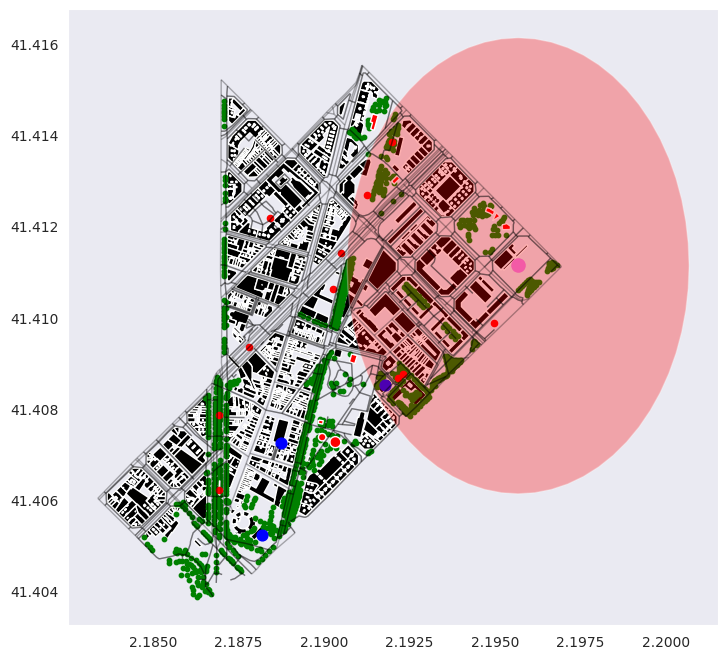

In [99]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings.plot(ax=ax, facecolor="black")

# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

# Plot restaurants
#restaurants.plot(ax=ax, color="orange", markersize=10)

# Plot trees
trees.plot(ax=ax, color="green", markersize=10)

# Plot trees
playgrounds.plot(ax=ax, color="red", markersize=20)

# Plot toilets
toilets.plot(ax=ax, color="blue", markersize=60)

# Plot schools
#schools.plot(ax=ax, color="blue", markersize=60)

# Plot Complex Esportiu Municipal Clot de la Mel
geocoded_addresses.plot(ax=ax, color="violet", markersize=90)
rad.plot(ax=ax, linewidth=1, facecolor="red", alpha=0.3)

plt.show()

In [100]:
accessible_toilets = [r for r in toilets["geometry"] if isinstance(r, Point) and r.within(rad["geometry"][0])]
accessible_toilets = rad = geopandas.GeoDataFrame(
    {
        "geometry": accessible_toilets,
    },
    crs=buildings.crs
)

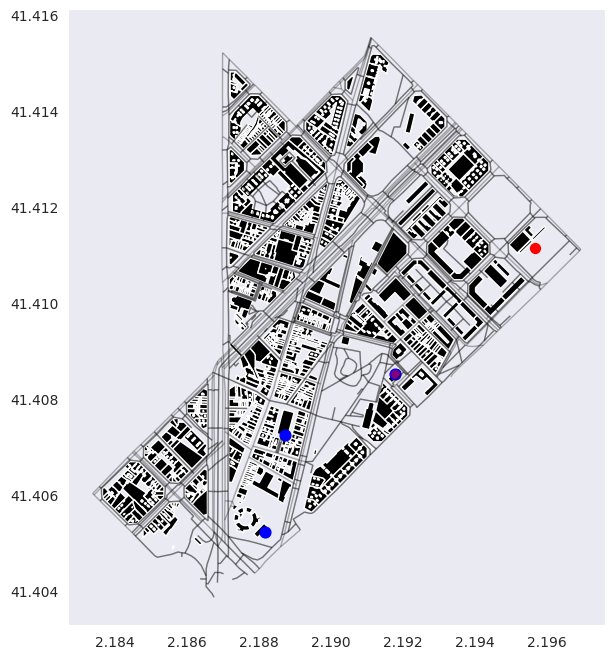

In [101]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings.plot(ax=ax, facecolor="black")

# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

# Plot restaurants
#restaurants.plot(ax=ax, facecolor="pink", markersize=10, alpha=0.7)

# Plot toilets
toilets.plot(ax=ax, color="blue", markersize=60)

# Plot IAAC
geocoded_addresses.plot(ax=ax, facecolor="red", markersize=50)
rad.plot(ax=ax, linewidth=1, facecolor="red", alpha=0.3)

accessible_toilets.plot(ax=ax, facecolor="purple", markersize=20, alpha=1.0)

plt.show()

### 🕸 Network Analysis

With osmnx we can get statistics necessary for urban analysis within a defined area. Let's define our area as a polygon:

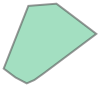

In [102]:
zone = edges.unary_union.convex_hull
zone

In [103]:
stats = osmnx.basic_stats(graph, area=zone.area)
stats

{'n': 955,
 'm': 2625,
 'k_avg': 5.49738219895288,
 'edge_length_total': 74881.91900000024,
 'edge_length_avg': 28.526445333333424,
 'streets_per_node_avg': 3.3769633507853403,
 'streets_per_node_counts': {0: 0, 1: 42, 2: 1, 3: 477, 4: 428, 5: 4, 6: 3},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.04397905759162304,
  2: 0.0010471204188481676,
  3: 0.49947643979057593,
  4: 0.4481675392670157,
  5: 0.004188481675392671,
  6: 0.0031413612565445027},
 'intersection_count': 913,
 'street_length_total': 45882.326,
 'street_segment_count': 1563,
 'street_length_avg': 29.355294945617402,
 'circuity_avg': 1.0200181637951844,
 'self_loop_proportion': 0.0012795905310300703,
 'node_density_km': 10806992928831.547,
 'intersection_density_km': 10331711564422.201,
 'edge_density_km': 847380491235957.4,
 'street_density_km': 519214631037009.25}

What do these stats mean?

[Link](https://osmnx.readthedocs.io/en/stable/user-reference.html#module-osmnx.stats)

#### 〽️ Shortest route

In [104]:
origin = (
    osmnx.geocode_to_gdf("Complex Esportiu Municipal Clot de la Mel")  # fetch geolocation
    .to_crs(edges.crs)  # transform to UTM
    .at[0, "geometry"]  # pick geometry of first row
    .centroid  # use the centre point
)

destination = (
    osmnx.geocode_to_gdf("Escola Casas")
    .to_crs(edges.crs)
    .at[0, "geometry"]
    .centroid
)

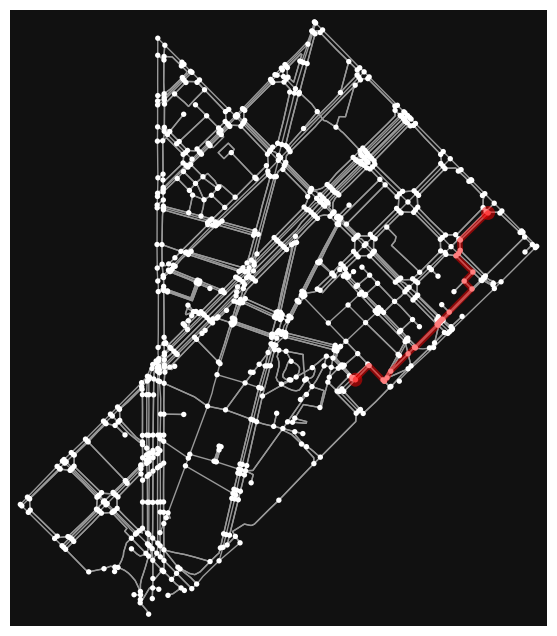

In [105]:
origin_node_id = osmnx.nearest_nodes(graph, origin.x, origin.y)
destination_node_id = osmnx.nearest_nodes(graph, destination.x, destination.y)

# calculating the shortest path:
route = osmnx.shortest_path(graph, origin_node_id, destination_node_id)

# plotting the projection
fig, ax = osmnx.plot_graph_route(graph, route)

In [106]:
route_nodes = nodes.loc[route]
route_line = LineString(
    list(route_nodes.geometry.values)
)
route_geom = geopandas.GeoDataFrame(
    {
        "geometry": [route_line],
        "osm_nodes": [route],
    },
    crs=edges.crs
)

# Calculate the route length
route_geom.length

<ipython-input-106-3f1016416ab9>:14: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  route_geom.length


0    0.006298
dtype: float64

### 🕸 Walkability analysis

How far can you reach from a place on foot?

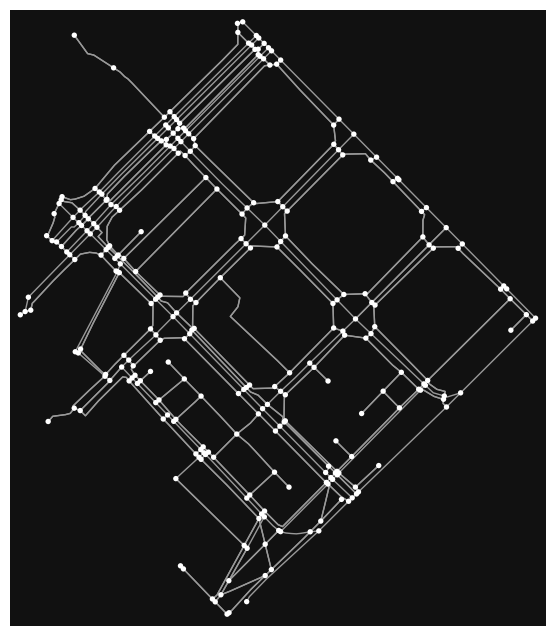

In [107]:
# getting iaac node from the graph:
Complex_Esportiu_node = osmnx.distance.nearest_nodes(graph, p.x, p.y, return_dist=False)

# cutting the graph to hold 1km distance from the node only:
g = osmnx.truncate.truncate_graph_dist(graph, Complex_Esportiu_node, max_dist=500)
figure, ax = osmnx.plot_graph(g)


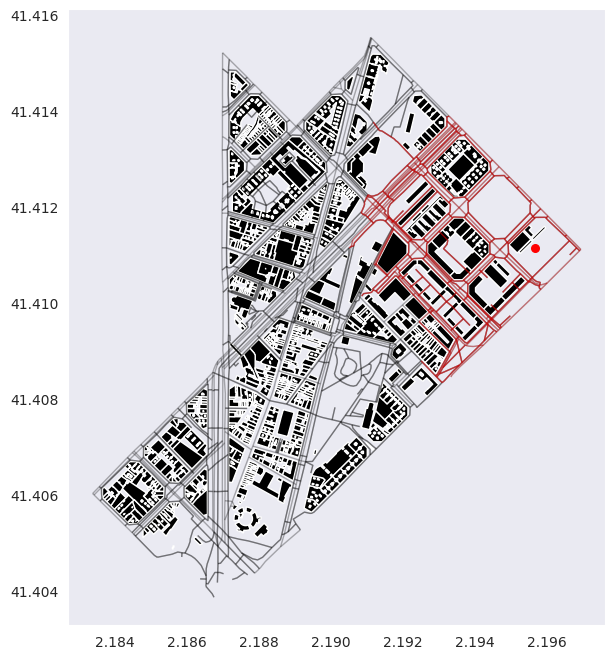

In [108]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings.plot(ax=ax, facecolor="black")
geom.plot(ax=ax, facecolor="red", markersize=30)


# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

nodes1, edges1 = osmnx.graph_to_gdfs(g)
edges1.plot(ax=ax, linewidth=1, edgecolor="red", alpha=0.3)
plt.show()

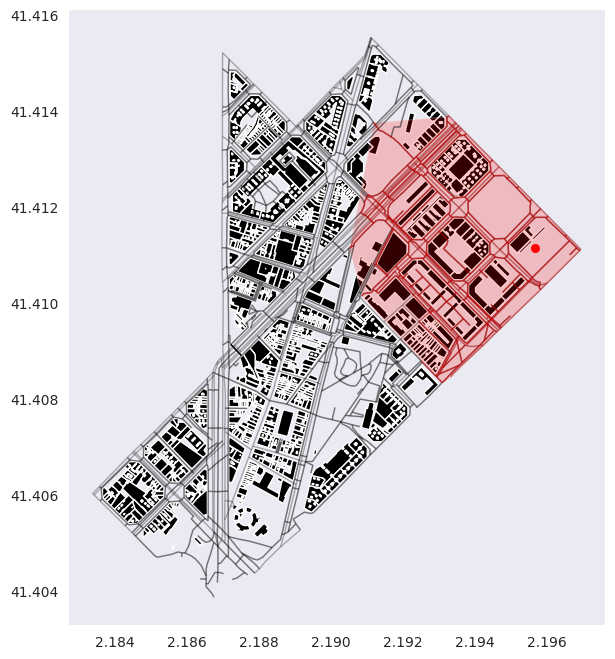

In [109]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings.plot(ax=ax, facecolor="black")
geom.plot(ax=ax, facecolor="red", markersize=30)


# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

nodes1, edges1 = osmnx.graph_to_gdfs(g)
edges1.plot(ax=ax, linewidth=1, edgecolor="red", alpha=0.3)

walkable_zone = edges1.unary_union.convex_hull

w_zone_mapped = geopandas.GeoDataFrame(
    {
        "geometry": [walkable_zone],
    },
    crs=buildings.crs
)

w_zone_mapped.plot(ax=ax, facecolor="red", alpha=0.2)


plt.show()

### 🧬 Resources

* [Downloading data for entire countries / continents](https://download.geofabrik.de/)
* [Automating GIS processes course 2023](https://autogis-site.readthedocs.io/en/latest/course-info/general-information.html)
* [OSMNX](https://osmnx.readthedocs.io/en/stable/user-reference.html)
* [shapely](https://shapely.readthedocs.io/en/stable/geometry.html)

This notebook is based on the material from [Automating GIS processes course 2023](https://autogis-site.readthedocs.io/en/latest/course-info/general-information.html) from [University of Helsinki](https://www.helsinki.fi/sv) by Henrikki Tenkanen, Vuokko Heikinheimo and Håvard Wallin Aagesen.

Materials taken from the course belong mostly to the [Lesson 3 Geocoding](https://autogis-site.readthedocs.io/en/latest/lessons/lesson-3/geocoding.html) and [Lesson 6 Retrieving data from OSM and Network Analysis](https://autogis-site.readthedocs.io/en/latest/lessons/lesson-6/overview.html). Material was adapted for the purposes of this course by changing the location in the example as well as adding calculation of walking distance from a given point.


Thanks to them for maintaining [the course repo](https://github.com/Automating-GIS-processes/site/) and improving the material from year to year.